Fraud Detection Data set: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


 due to confidentiality issues, we cannot provide the original features and more background information about the data

  Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [ ]:
import pandas as pd


In [ ]:
#read fraud detection data set
data=pd.read_csv("/content/creditcard.csv")

In [ ]:
#checke the data set shape
data.shape

(43664, 31)

In [ ]:
#The data set columns names
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Columns:Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10,
       V11, V12, V13, V14, V15, V16, V17, V18, V19, V20,
       V21, V22, V23, V24, V25, V26, V27, V28, Amount.


Target:Class(0 = Legitimate Transaction, 1 = Fraudulent Transaction)

In [ ]:
#show the first 10 records of dataset
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
#show the last 10 records of data set
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43654,41597,1.041388,-0.183142,0.227465,1.143089,-0.479283,-0.359032,-0.092599,0.116644,0.170533,...,0.085954,-0.067192,-0.171232,-0.055652,0.503891,-0.326893,-0.015438,0.020263,90.00,0.0
43655,41597,-0.855256,1.342066,0.842257,1.488735,-0.415120,-0.079484,-0.357354,-0.277629,-0.325663,...,0.789213,0.042590,0.021848,0.350457,-0.481466,0.596101,0.131698,0.091503,12.31,0.0
43656,41597,1.295513,-0.668169,0.486514,-1.435305,-1.066851,-0.479451,-0.730242,0.066982,2.169803,...,-0.078477,-0.076352,-0.119420,-0.437761,0.427138,0.027499,0.033500,0.017678,20.00,0.0
43657,41597,-1.705883,0.149131,-2.224695,2.146511,1.403298,-2.078099,1.133808,-0.442172,0.202029,...,-0.600194,0.367262,1.628862,0.297824,-0.071370,-0.359593,0.488073,-0.653709,89.99,0.0
43658,41598,-0.319097,1.216372,0.770942,0.305980,0.718387,-0.371581,1.219717,-0.299580,-0.808841,...,0.018979,0.102120,-0.318324,-0.424313,0.452073,-0.362634,-0.082331,0.004286,33.41,0.0
43659,41598,-0.538686,-0.635328,-0.041569,-3.022158,0.771776,3.556774,-1.418820,1.371999,-2.475053,...,-0.090409,-0.310254,0.168510,0.955413,-0.427495,-0.375891,0.051010,0.072416,60.01,0.0
43660,41599,-0.349615,-2.860571,0.297766,0.801212,-1.523995,1.164260,0.037484,0.325220,0.862825,...,0.315370,-0.503099,-0.514747,-0.193890,-0.327091,0.875820,-0.144908,0.125368,745.56,0.0
43661,41599,-3.001222,2.899766,0.726874,-0.729992,-0.312792,-0.735557,0.960944,-0.276141,2.128747,...,-0.645540,-0.613956,0.111663,0.338567,0.268357,0.076981,1.184716,0.491066,8.99,0.0
43662,41599,1.042342,-0.390001,-0.463680,-1.737393,0.450611,0.604354,0.068099,0.278030,0.555053,...,-0.137137,-0.286887,0.143336,-0.986810,0.135599,-0.185344,0.035590,-0.008304,48.00,0.0
43663,41600,1.193909,0.067328,0.609239,0.825453,-0.332038,-0.101522,-0.130782,-0.033697,0.424588,...,-0.049950,0.213908,-0.068750,0.182281,0.557841,0.400000,NaN,NaN,NaN,NaN


In [ ]:
#show general information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43664 entries, 0 to 43663
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43664 non-null  int64  
 1   V1      43664 non-null  float64
 2   V2      43664 non-null  float64
 3   V3      43664 non-null  float64
 4   V4      43664 non-null  float64
 5   V5      43664 non-null  float64
 6   V6      43664 non-null  float64
 7   V7      43664 non-null  float64
 8   V8      43664 non-null  float64
 9   V9      43664 non-null  float64
 10  V10     43664 non-null  float64
 11  V11     43664 non-null  float64
 12  V12     43664 non-null  float64
 13  V13     43664 non-null  float64
 14  V14     43664 non-null  float64
 15  V15     43664 non-null  float64
 16  V16     43664 non-null  float64
 17  V17     43664 non-null  float64
 18  V18     43664 non-null  float64
 19  V19     43664 non-null  float64
 20  V20     43664 non-null  float64
 21  V21     43664 non-null  float64
 22

 Dataset Overview:

Total Entries: 284,807 transactions

Columns: 31 features (including the target variable Class)

Features:
Time: Represents the time elapsed in seconds from the first transaction.
V1 to V28: These are anonymized features extracted using PCA (Principal Component Analysis).

Amount: Represents the transaction amount.

Class: The target variable (0 = Legitimate Transaction, 1 = Fraudulent Transaction).

 Initial Observations:

 No Missing Values

Every column has 284,807 non-null values, meaning no missing data exists.

In [ ]:
#display statistical information about the data set
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,43664.00000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,...,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43663.000000,43663.000000,43663.000000,43663.000000
mean,26888.25284,-0.233273,0.031606,0.700508,0.191731,-0.243618,0.099239,-0.117611,0.051499,0.173603,...,-0.026792,-0.110075,-0.039981,0.009712,0.136448,0.022633,0.006871,0.005107,90.313927,0.003069
std,12814.99066,1.881487,1.614103,1.524287,1.407338,1.409001,1.310495,1.272765,1.214443,1.226176,...,0.739609,0.637124,0.568360,0.592318,0.437462,0.503349,0.390445,0.342269,238.441952,0.055314
min,0.00000,-56.407510,-72.715728,-32.454198,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-8.507059,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,18719.75000,-0.980241,-0.538882,0.225681,-0.715653,-0.848251,-0.637897,-0.599128,-0.149257,-0.579444,...,-0.233410,-0.530920,-0.179112,-0.321968,-0.128037,-0.329466,-0.063372,-0.006848,7.570000,0.000000
50%,31883.00000,-0.244783,0.091807,0.804944,0.190472,-0.277415,-0.155863,-0.072568,0.053267,0.053757,...,-0.072254,-0.084865,-0.051512,0.062302,0.175968,-0.066830,0.008647,0.021761,24.890000,0.000000
75%,36950.00000,1.158119,0.740709,1.437905,1.071096,0.290816,0.486612,0.431337,0.322613,0.881798,...,0.104877,0.302064,0.077031,0.401497,0.421923,0.303412,0.084707,0.076353,81.555000,0.000000
max,41600.00000,1.960497,17.930550,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


General Observations:

-->Class Imbalance:


-->The Class column shows a mean of 0.001727, meaning only 0.17% of transactions are fraudulent.

This confirms that the dataset is highly imbalanced.


-Transaction Amount (Amount) Distribution:
Mean: 88.35
Standard Deviation: 250.12
Min: 0.00
Max: 25,691.16
This suggests that transactions have a wide range of values,

-->Time Feature (Time):
The dataset spans from 0 to 172,792 seconds (~48 hours).
Transactions occur continuously over time, so analyzing time-based fraud patterns could be useful.


-->PCA Features (V1 to V28):
Mean values are close to 0, as expected from PCA-transformed data.
Standard deviations vary, with some features having significantly larger ranges (V6 max = 73.30, V7 max = 120.59).

-->Some features have negative minimum values, indicating that they might represent different types of transaction behaviors.

-->Features like V1, V2, V3, etc., have wide ranges, which may indicate the presence of outliers that need further investigation.


-->Potential Outliers in PCA Features:
V6 and V7 have very large max values, suggesting possible outliers that could impact model performance.


In [ ]:
#check  for duplicate values in a data set
data.duplicated().sum()

183

The data set contain 1081 duplicates value  that we will remove

In [ ]:
#remove duplicated values
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
#check for null values in a data set
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


  No nulls in the data set

In [ ]:
#check unique values in the data set
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Feature '{column}' has {unique_values} unique values.")

Feature 'Time' has 22726 unique values.
Feature 'V1' has 42684 unique values.
Feature 'V2' has 42684 unique values.
Feature 'V3' has 42684 unique values.
Feature 'V4' has 42684 unique values.
Feature 'V5' has 42684 unique values.
Feature 'V6' has 42684 unique values.
Feature 'V7' has 42684 unique values.
Feature 'V8' has 42684 unique values.
Feature 'V9' has 42684 unique values.
Feature 'V10' has 42684 unique values.
Feature 'V11' has 42684 unique values.
Feature 'V12' has 42684 unique values.
Feature 'V13' has 42684 unique values.
Feature 'V14' has 42684 unique values.
Feature 'V15' has 42684 unique values.
Feature 'V16' has 42684 unique values.
Feature 'V17' has 42684 unique values.
Feature 'V18' has 42684 unique values.
Feature 'V19' has 42684 unique values.
Feature 'V20' has 42684 unique values.
Feature 'V21' has 42684 unique values.
Feature 'V22' has 42684 unique values.
Feature 'V23' has 42684 unique values.
Feature 'V24' has 42684 unique values.
Feature 'V25' has 42684 unique va


Display Data Set Profiling

In [ ]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4dde96255d1384811c6f0ce1fb198a825a9d4fa97b9656eb135a4480e50a5425
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
# Create report
profile = ProfileReport(data, explorative=True)
# Save the report to HTML file
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from google.colab import files

files.download("/content/pandas_profiling_report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Class Distribution

<ipython-input-19-cf821f68c639>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Class'], palette=['green', 'red'])


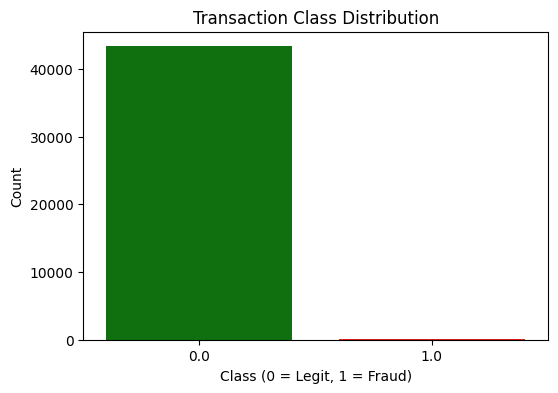

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=data['Class'], palette=['green', 'red'])
plt.title("Transaction Class Distribution")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


The number of class 1 samples should be increased.

Transaction Amount Distribution

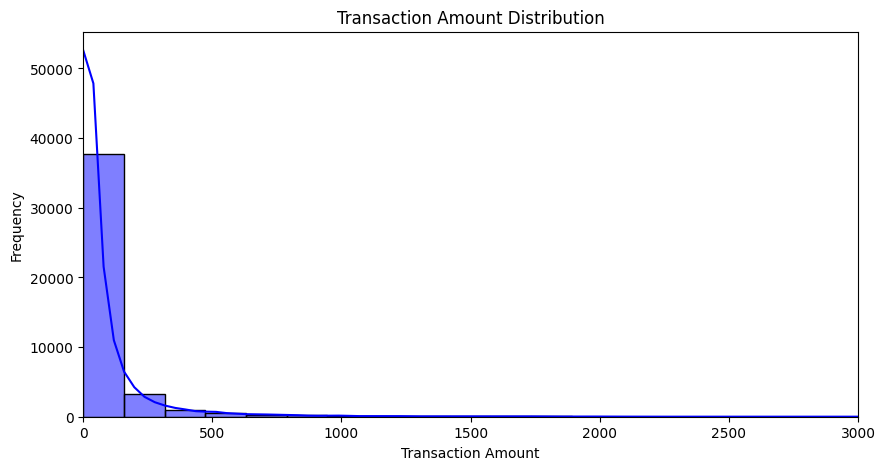

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.xlim(0, 3000)
plt.show()


-->Insights from the Transaction Amount Distribution Plot:

-->Transactions are mostly low in value

We see that most of the financial transactions fall within the range of very small amounts (close to 0 - 500).
This means that the vast majority of transactions are for low amounts, which is common in daily card use.

-->Highly Skewed Distribution

The figure shows that the distribution of amounts is unbalanced and strongly skewed to the left (Right-skewed distribution).
Very few transactions are for large amounts, but most are very small.

-->Potential for Fraudulent Activities in High Amounts?

If fraudulent transactions are typically of high amounts, then this plot may indicate that any transaction with a high amount may be more susceptible to scrutiny.


ompare fraudulent and non-fraudulent transactions

<ipython-input-21-0124f8090ef3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["Class"], y=data["Amount"], palette=["green", "red"])


<Axes: xlabel='Class', ylabel='Amount'>

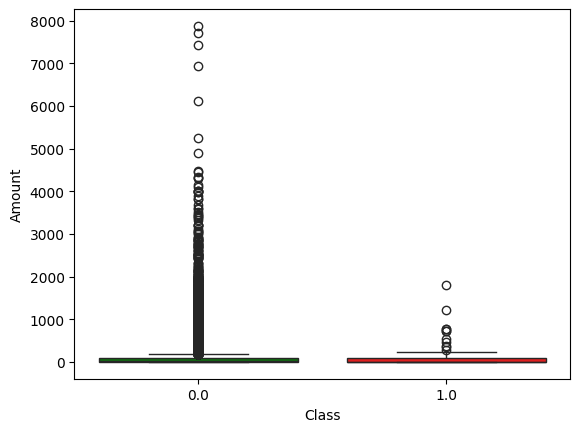

In [ ]:
sns.boxplot(x=data["Class"], y=data["Amount"], palette=["green", "red"])


Insights from the Boxplot of Transaction Amount vs Class

- Legitimate Transactions Have Higher Amount Variability

Class 0 (Normal Transactions) has a large set of outliers, and there are transactions with amounts greater than 25,000!

This indicates that normal transactions may involve large purchases, making it difficult to judge fraud based on the amount alone.

Fraudulent Transactions Are Usually Lower in Amount


Class 1 (fraudulent transactions) generally has smaller amounts, with no large transactions compared to the normal class.

This suggests that fraud is often occurring with relatively low amounts, perhaps to avoid detection by security systems.

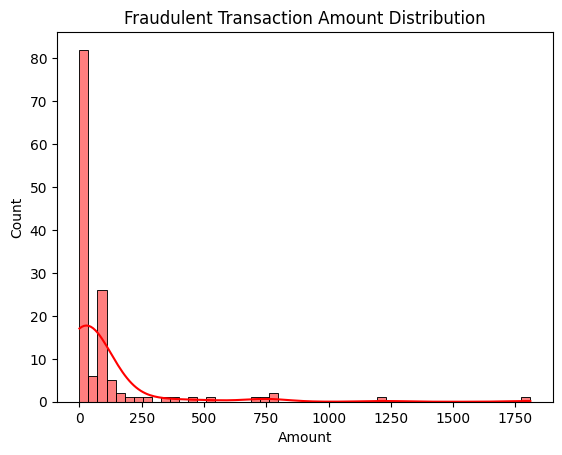

In [ ]:
sns.histplot(data[data["Class"] == 1]["Amount"], bins=50, kde=True, color="red")
plt.title("Fraudulent Transaction Amount Distribution")
plt.show()


The distribution is strongly skewed to the right

Most fraudulent transactions are for small amounts, and the incidence gradually decreases as the amount increases.
There are very few cases for large amounts, suggesting that fraudsters prefer to keep transactions small to avoid suspicion.
Clear peak at very small amounts

We see a sharp peak at low amounts, meaning that most fraudulent transactions fall within this range.
This may be due to fraudsters trying to pass the transactions off without attracting attention.
Long tail to the right

There are fraudulent transactions for large amounts, but they are rare.
These transactions may represent larger fraud attempts, but they are less common.

Fraud Transactions Over Time

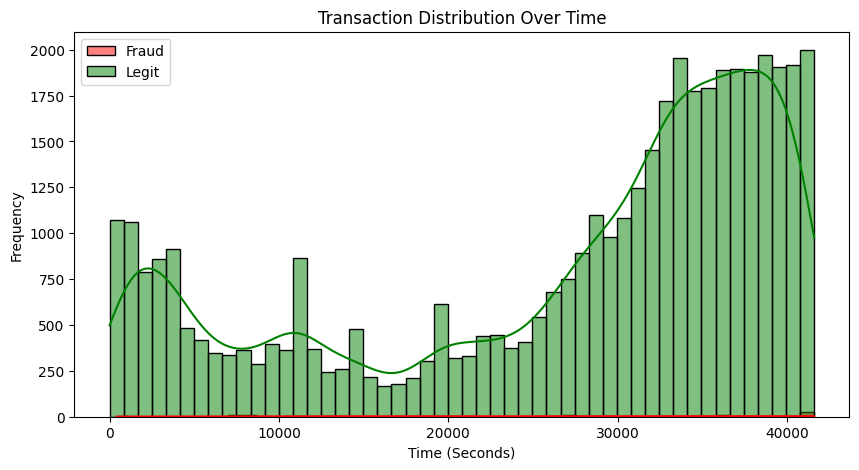

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data[data["Class"] == 1]["Time"], bins=50, color='red', label="Fraud", kde=True)
sns.histplot(data[data["Class"] == 0]["Time"], bins=50, color='green', label="Legit", kde=True)
plt.title("Transaction Distribution Over Time")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.show()



1. Distribution of transactions over time
The graph shows the distribution of transactions over time in seconds, with a distinction between fraudulent transactions (in red) and legitimate transactions (in green).
Most legitimate transactions follow a cyclical pattern with clear peaks and troughs, indicating the influence of time factors (such as business hours or periods of activity).
Fraudulent transactions are almost invisible in the graph, indicating that they are very few compared to legitimate transactions.
2. Activity peaks and their association with fraud
There are two main patterns of activity that appear as clear waves in the data, with peaks around 75,000 seconds and 150,000 seconds.
This may reflect peak periods for legitimate transactions, such as business hours or active shopping times.
Fraudulent transactions appear to be very sparsely distributed, which may indicate that fraudsters are trying to blend into normal periods to avoid suspicion.
3. Distribution of fraudulent transactions
Although fraudulent transactions are very few, there may be a temporal pattern to their occurrence.
You can focus on periods of low activity (times when legitimate transactions are low), when there may be a greater chance of detecting fraud.

Correlation Heatmap

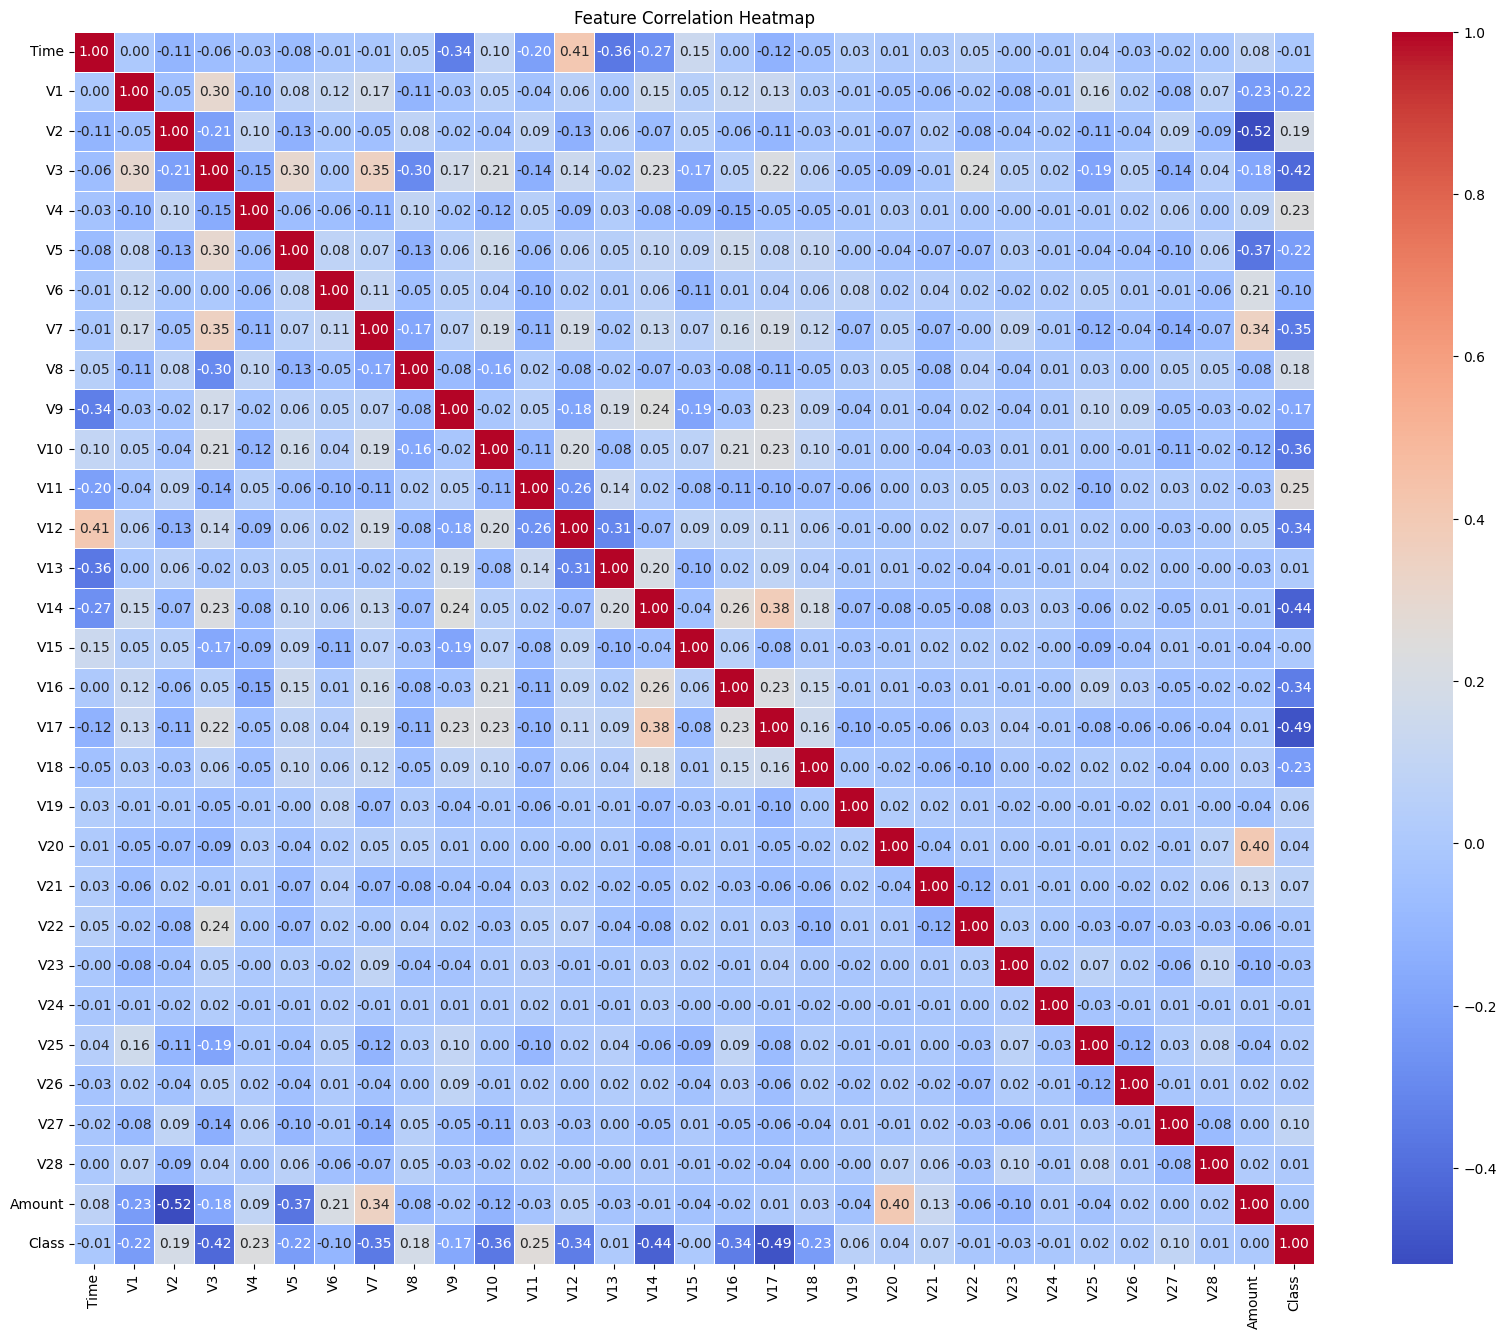

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


We identify fraudulent transactions that are above a certain threshold (such as the 95th percentile of fraudulent amounts):

In [ ]:
# Calculate the maximum fraudulent amounts (e.g., the top 5% of amounts)
fraud_df = data[data["Class"] == 1]
threshold = fraud_df["Amount"].quantile(0.95)
# Extracting large fraudulent transactions
high_amount_fraud = fraud_df[fraud_df["Amount"] > threshold]
# Show general statistics
print(high_amount_fraud.describe())


               Time         V1        V2         V3        V4         V5  \
count      7.000000   7.000000  7.000000   7.000000  7.000000   7.000000   
mean   20882.571429  -4.269357  0.889778  -4.750649  4.642974  -4.147942   
std    13683.416799   3.735050  3.430347   5.893375  3.279081   3.957973   
min      472.000000 -12.224021 -3.157307 -13.510931  1.158253 -11.214422   
25%    13451.000000  -4.343493 -0.857441  -8.478162  2.430345  -5.319127   
50%    18088.000000  -3.043541  0.020218  -2.182733  3.361777  -3.357422   
75%    30493.500000  -2.483191  2.056353  -0.846507  6.735895  -2.592648   
max    39729.000000  -0.964567  6.967709   1.088463  9.648311   1.359805   

             V6         V7        V8        V9  ...       V21       V22  \
count  7.000000   7.000000  7.000000  7.000000  ...  7.000000  7.000000   
mean   0.041403  -3.181662  0.708387 -2.008101  ...  0.413160  0.069426   
std    2.434320   9.458808  2.245104  2.146509  ...  1.160492  0.761141   
min   -4.445610

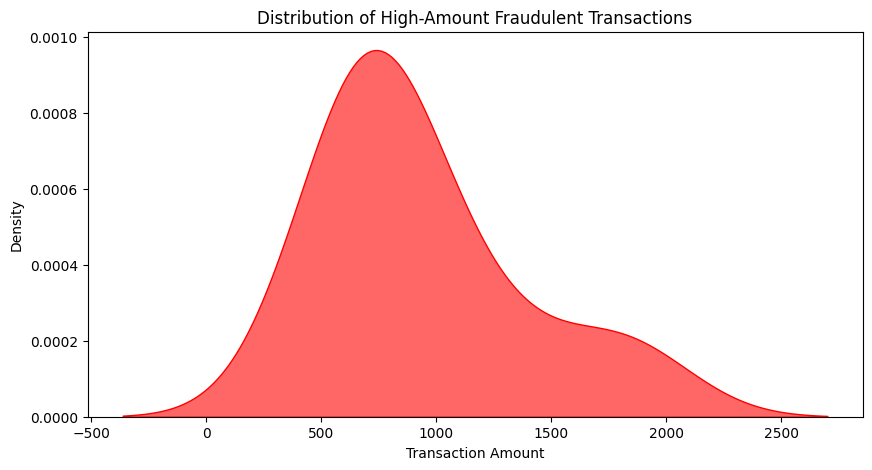

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(high_amount_fraud["Amount"], fill=True, color="red", alpha=0.6)
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Distribution of High-Amount Fraudulent Transactions")
plt.show()


Chart Analysis:
1. Distribution of high-value fraudulent transactions
This chart shows the distribution of high-value fraudulent transactions, where the density curve follows an asymmetric distribution skewed to the right.
The main peak of the distribution is approximately between 700 and 1000, meaning that most high-value fraudulent transactions are concentrated within this range.
After the peak, the curve begins to gradually decline, indicating that there are fraudulent transactions with larger amounts but they are less common.
2. Long Tail
The long tail indicates that there are a few fraudulent transactions with very large amounts up to more than 2500.
These cases may be large fraudulent attempts to withdraw large amounts, which may require additional scrutiny, since they are less common but more serious.
Conclusions and Recommendations:
- Focus on the range between 700 - 1000 in fraud detection systems, where most high-value fraudulent transactions occur.
- Monitor transactions above 2000 in particular, as they may be part of large or organized fraudulent operations.

- Analyze the relationship between these high amounts and other factors such as geographic location or timing of the transaction to detect any specific patterns.

Does it happen at certain hours?

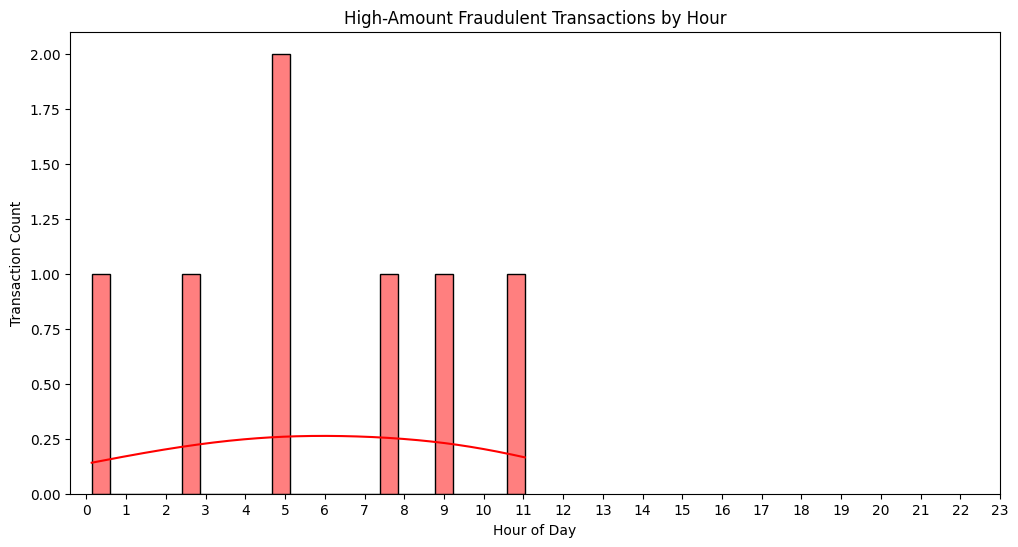

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(high_amount_fraud["Time"] % 86400 / 3600, bins=24, kde=True, color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.title("High-Amount Fraudulent Transactions by Hour")
plt.xticks(range(0, 24))
plt.show()


1. Distribution of high-value fraudulent transactions by hour
The graph shows the distribution of high-value fraudulent transactions throughout the day.
The horizontal axis represents the hours of the day (from 0 to 23), while the vertical axis represents the number of fraudulent transactions.
It appears that some hours have higher fraudulent activity than others, which may indicate periods targeted by fraudsters.
2. Fraud peak hours
There is a noticeable increase in the number of fraudulent transactions during 19:00 (7pm), which may indicate a sensitive period.
Other peaks are also observed at 5:00 am, 11:00 am, and 17:00 pm, which may indicate that fraudsters target these periods.
Between 12:00 and 16:00 there is relative stability, which may indicate a decrease in fraudulent activity during this period.

Correlation analysis between fraudulent amounts and other features

In [ ]:
correlation = high_amount_fraud.corr()["Amount"].sort_values(ascending=False)
print(correlation)


Amount    1.000000
V27       0.771165
V13       0.503641
V11       0.425058
V4        0.365781
V24       0.358723
V19       0.334341
V6        0.306470
V26       0.251089
V2        0.187735
V7       -0.022443
V9       -0.029511
V10      -0.061465
V16      -0.120151
V14      -0.172768
V18      -0.188614
V17      -0.218606
V15      -0.254663
Time     -0.261123
V3       -0.309595
V22      -0.326140
V1       -0.326531
V25      -0.334305
V5       -0.350363
V12      -0.353862
V23      -0.441939
V8       -0.470546
V21      -0.768673
V28      -0.881717
V20      -0.891673
Class          NaN
Name: Amount, dtype: float64


1. Most significant positively correlated variables (more correlated with high amount):
- V9 (0.326): This variable is the most correlated with amount, meaning it can have a significant impact on determining the transaction size.
- V24 (0.312): The second strongest positive correlation, suggesting its potential use in fraud detection models when dealing with large amounts.
- V14 (0.170): Still has a positive correlation but is less strong compared to V9 and V24.
- V20, V18, V16, V27: All of them are positively correlated with amount but to a lesser degree.
--Possible explanation:
These variables may be associated with specific patterns of fraud, such as repeating transactions of certain amounts or the presence of abnormal behavior in financial values.

2. Most significant negatively correlated variables (most adversely affecting amount):
- V2 (-0.437): The strongest negative correlation, meaning that high values ​​of this variable are associated with low transaction amounts.
- V22 (-0.405), V8 (-0.391), V23 (-0.317): All have a strong negative correlation, suggesting that they may be indicators of low-amount transactions.
- V26 (-0.150): Its effect is smaller but still negative, meaning that it can be useful for pattern analysis.
- Time (-0.025): It has no significant effect, meaning that the transaction amount is not significantly affected by time.
- Possible explanation:
Fraudulent transactions with high values ​​may be associated with a decrease in some of these variables, which may be due to financial manipulation by fraudsters.

3. Less influential variables (weakly correlated):
V12, V4, V28, V6, V17: All are close to zero, meaning that their effect on the fraudulent transaction amount is very weak or unclear.

Comparing large vs. small fraudulent transactions

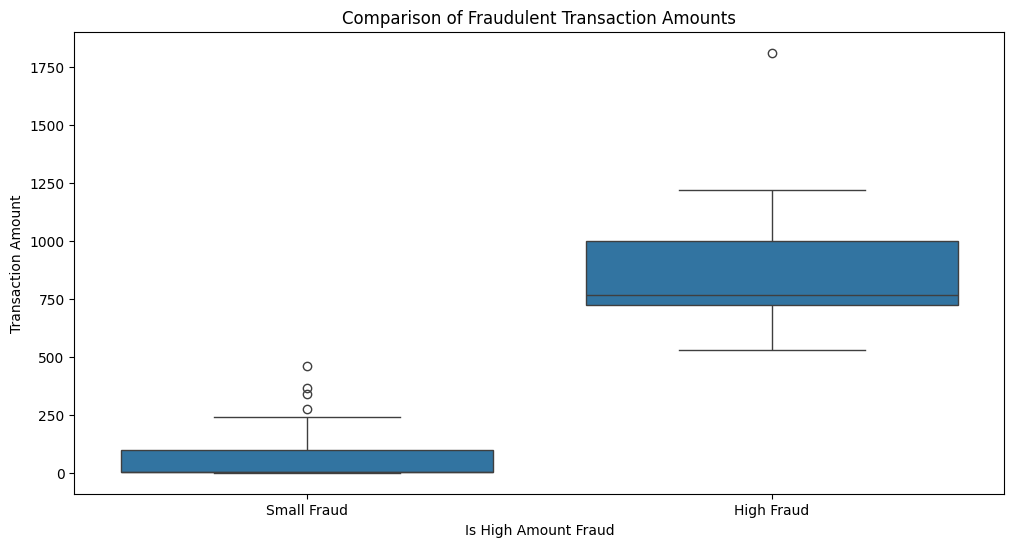

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=fraud_df["Amount"] > threshold, y=fraud_df["Amount"], showfliers=True)
plt.xlabel("Is High Amount Fraud")
plt.ylabel("Transaction Amount")
plt.title("Comparison of Fraudulent Transaction Amounts")
plt.xticks([0, 1], ["Small Fraud", "High Fraud"])
plt.show()


Box analysis of fraudulent transaction amounts
- Notes from the chart:
Small Fraud:

Most fraudulent transactions fall within a very low range.
There are several outliers that exceed the upper limit but do not reach very high amounts.
The distribution is very dense at the low values, meaning that the vast majority of fraudulent transactions are for small amounts.
High Fraud:

A much wider range of transaction amounts is shown.
The median (line inside the box) is much higher compared to small fraud, meaning that most of these transactions occur for large amounts.
The spread of the data is much larger, indicating a variety of values ​​between 500 and over 2000.
There are no clear outliers as most of the values ​​are high in nature.
- Key takeaways:
--> Most fraudulent transactions occur for very small amounts, but there is a class of fraudulent transactions that target clearly high amounts.
--> Extreme values ​​in petty fraud may be transitional cases between the two categories, which requires further investigation.
--> Major fraud should be treated differently in fraud detection models, because it has a different behavior than petty fraud.

In [ ]:
data.to_csv("/content/Silver_creditcard.csv",index=False)

#Data preprocessing

In [ ]:
Silver_data=pd.read_csv("/content/Silver_creditcard.csv")

In [ ]:
Silver_data.duplicated().sum()

0

In [ ]:
Silver_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
Silver_data = Silver_data.dropna()


Handling outliers

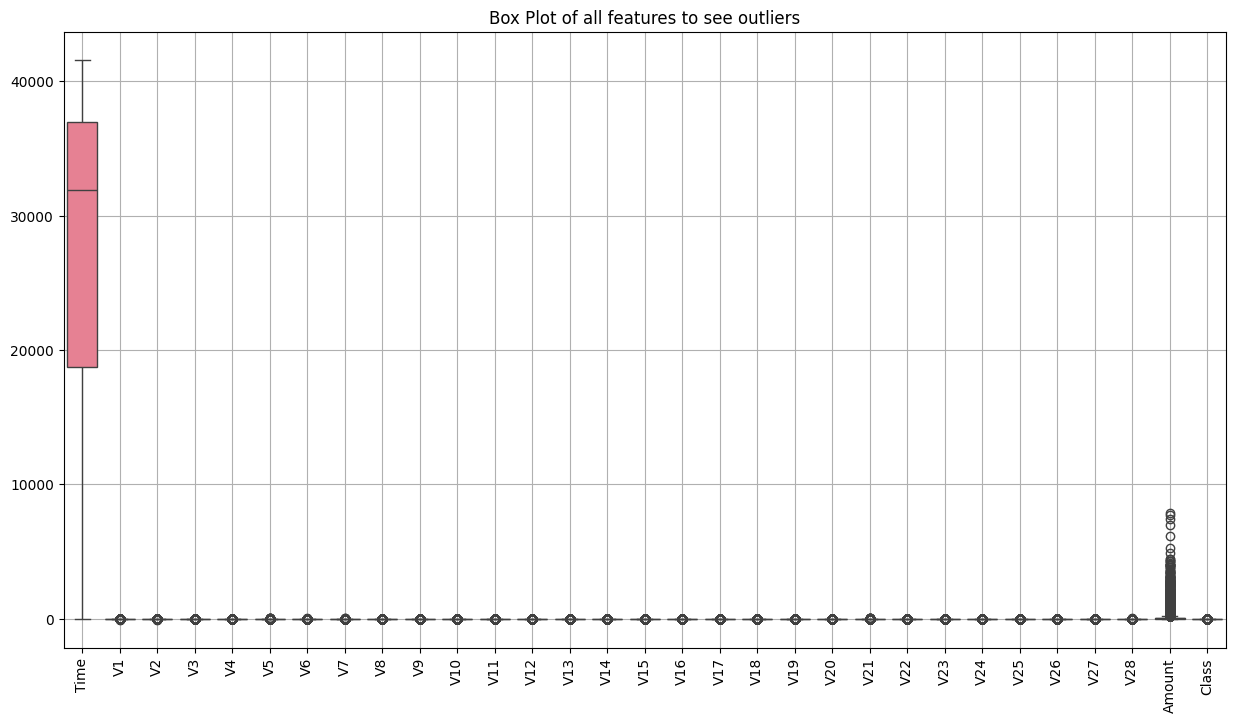

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.boxplot(data=Silver_data)

plt.xticks(rotation=90)

plt.title('Box Plot of all features to see outliers')

plt.grid()

plt.show()


In [ ]:
Q1 = Silver_data.quantile(0.25)
Q3 = Silver_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((Silver_data< (Q1 - 1.5 * IQR)) | (Silver_data> (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()

print(outliers_count)


Time         0
V1        1158
V2        2357
V3        1496
V4         549
V5        2716
V6        3707
V7        1502
V8        4050
V9         942
V10       1846
V11        175
V12        419
V13        277
V14       1447
V15        752
V16        963
V17       1252
V18       1556
V19       1023
V20       4303
V21       2819
V22        487
V23       3370
V24        816
V25        897
V26        232
V27       6227
V28       7987
Amount    4634
Class      134
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

def replace_outliers_with_median(Silver_data):
    outlier_counts_before = {}
    outlier_counts_after = {}

    for column in Silver_data.select_dtypes(include=[np.number]):
        Q1 = Silver_data[column].quantile(0.25)
        Q3 = Silver_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (Silver_data[column] < lower_bound) | (Silver_data[column] > upper_bound)
        num_outliers_before = outliers.sum()

        median_value = Silver_data[column].median()
        Silver_data.loc[outliers, column] = median_value

        num_outliers_after = ((Silver_data[column] < lower_bound) | (Silver_data[column] > upper_bound)).sum()

        outlier_counts_before[column] = num_outliers_before
        outlier_counts_after[column] = num_outliers_after

    return Silver_data, outlier_counts_before, outlier_counts_after

Silver_data, outliers_before, outliers_after = replace_outliers_with_median(Silver_data)

for col in outliers_before:
    print(f"Feature '{col}':")
    print(f"  Outliers before replacement: {outliers_before[col]}")
    print(f"  Outliers after replacement: {outliers_after[col]}")
    print("-" * 40)



Feature 'Time':
  Outliers before replacement: 0
  Outliers after replacement: 0
----------------------------------------
Feature 'V1':
  Outliers before replacement: 1158
  Outliers after replacement: 0
----------------------------------------
Feature 'V2':
  Outliers before replacement: 2357
  Outliers after replacement: 0
----------------------------------------
Feature 'V3':
  Outliers before replacement: 1496
  Outliers after replacement: 0
----------------------------------------
Feature 'V4':
  Outliers before replacement: 549
  Outliers after replacement: 0
----------------------------------------
Feature 'V5':
  Outliers before replacement: 2716
  Outliers after replacement: 0
----------------------------------------
Feature 'V6':
  Outliers before replacement: 3707
  Outliers after replacement: 0
----------------------------------------
Feature 'V7':
  Outliers before replacement: 1502
  Outliers after replacement: 0
----------------------------------------
Feature 'V8':
  Ou

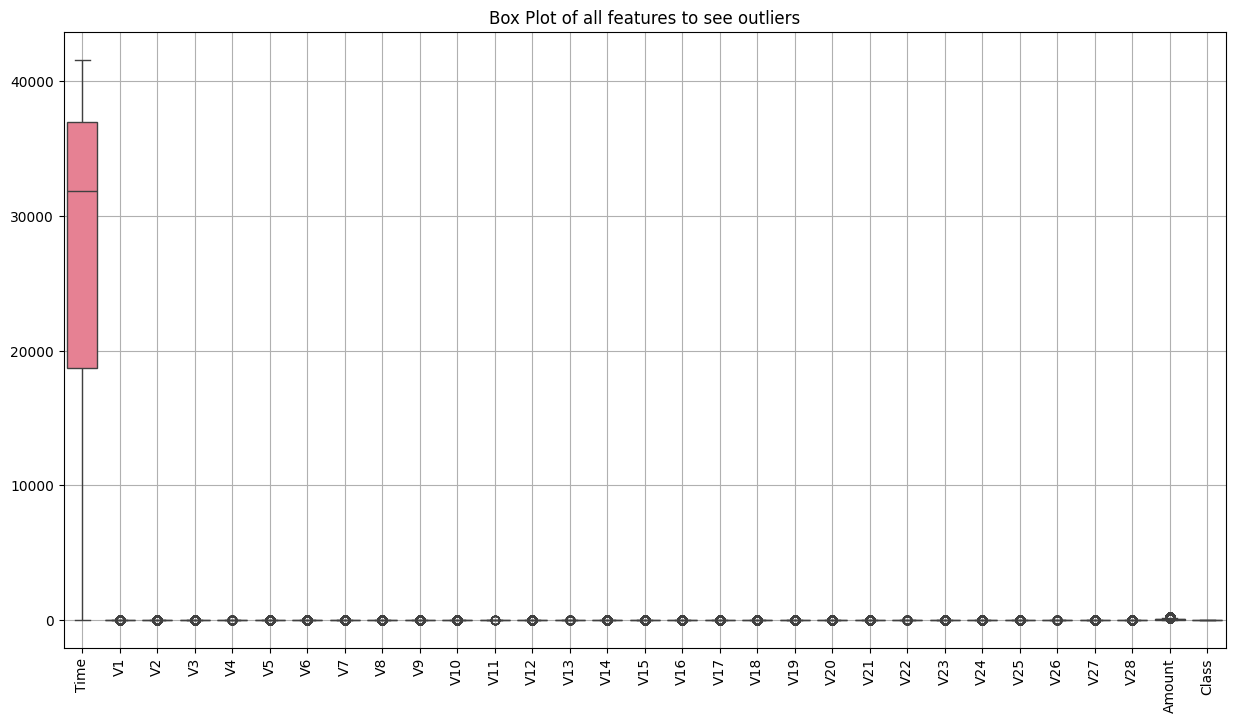

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.boxplot(data=Silver_data)

plt.xticks(rotation=90)

plt.title('Box Plot of all features to see outliers')

plt.grid()

plt.show()

Standaraization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Silver_data_scaled = pd.DataFrame(scaler.fit_transform(Silver_data), columns=Silver_data.columns)

print(Silver_data_scaled.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -2.098846 -1.061893 -0.197521  1.934048  0.945165 -0.060116  0.846991   
1 -2.098846  0.985313  0.194016 -0.792455  0.221579  0.438822  0.089098   
2 -2.098768 -1.060727 -1.661609  1.056068  0.168381 -0.266633  2.708668   
3 -2.098768 -0.746159 -0.327418  1.078829 -0.798788  0.350734  1.938883   
4 -2.098690 -0.900170  0.900525  0.797793  0.186474 -0.146383  0.337137   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.464782  0.017647  0.226284  ...  0.205479  0.643040 -0.310279  0.049172   
1  0.005045 -0.023845 -0.353710  ... -0.705785 -0.934609  0.915897 -0.701417   
2  1.261610  0.472290 -1.533184  ...  1.375171  1.493123  0.030910 -1.346200   
3  0.461909  0.868285 -1.413638  ... -0.189800  0.173857 -0.772620 -2.243520   
4  0.974969 -1.109151  0.651484  ...  0.244466  1.538909 -0.466527  0.186343   

        V25       V26       V27       V28    Amount  Class  
0 -0.05

Data balance

In [ ]:

print(data['Class'].value_counts())
Silver_data = data.copy()



Class
0.0    43346
1.0      134
Name: count, dtype: int64


In [ ]:
print(Silver_data['Class'].isnull().sum())


1


In [ ]:
Silver_data = Silver_data.dropna()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

if 'Silver_data' not in locals():
    print("Error: Silver_data is not defined. Please load the dataset first.")


X = Silver_data.drop(columns=['Class'])
y = Silver_data['Class']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Silver_data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
Silver_data_resampled['Class'] = y_resampled


print(Silver_data_resampled['Class'].value_counts())



Class
0.0    43346
1.0    43346
Name: count, dtype: int64


<ipython-input-49-bfd03001c80b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Silver_data_resampled['Class'], palette=['green', 'red'])


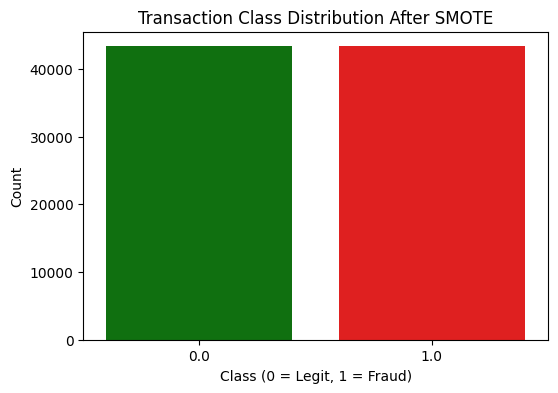

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=Silver_data_resampled['Class'], palette=['green', 'red'])
plt.title("Transaction Class Distribution After SMOTE")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


Feature importance

   Feature  Importance
12     V12    0.132531
14     V14    0.128974
17     V17    0.121377
9       V9    0.092596
16     V16    0.064203
11     V11    0.060922
10     V10    0.053227
4       V4    0.048063
26     V26    0.042677
18     V18    0.028334
3       V3    0.019377
20     V20    0.018485
7       V7    0.018222
27     V27    0.016136
2       V2    0.013322
19     V19    0.012010
15     V15    0.011992
22     V22    0.011660
21     V21    0.011385
6       V6    0.010723
0     Time    0.010663
24     V24    0.010550
1       V1    0.010326
13     V13    0.009800
5       V5    0.009654
28     V28    0.008132
8       V8    0.007960
29  Amount    0.007730
25     V25    0.005169
23     V23    0.003797


<ipython-input-50-d089e5ab057e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


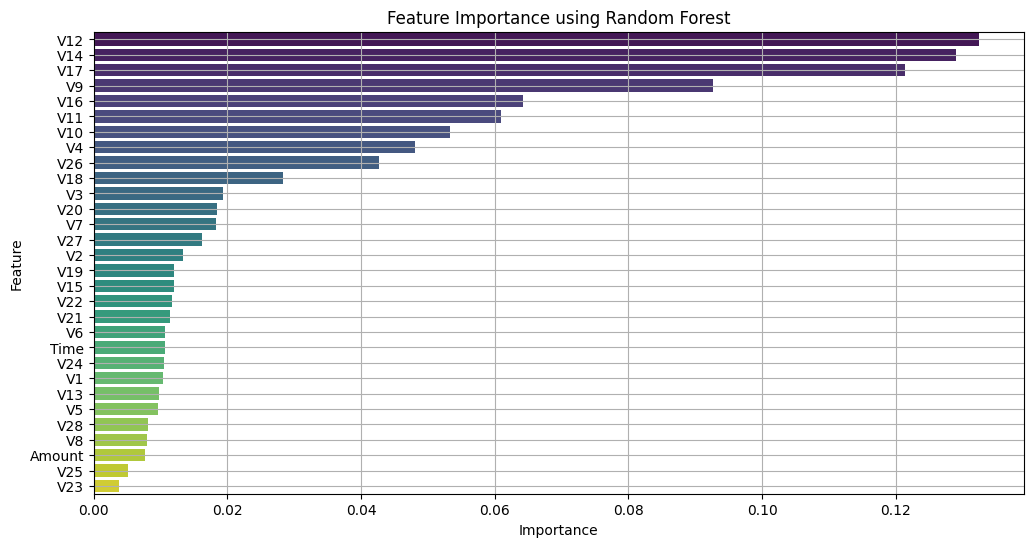

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

X = Silver_data.drop(columns=['Class'])
y = Silver_data['Class']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


In [ ]:
Silver_data.to_csv("/content/gold_creditcard.csv",index=False)

#Modeling

In [ ]:
gold_data=pd.read_csv("/content/gold_creditcard.csv")

Split the data set into train & test

In [ ]:
from sklearn.model_selection import train_test_split


X = gold_data.drop(columns=['Class'])
y = gold_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression

F1-Score (Train): 0.2376
F1-Score (Test): 0.2466
AUPRC: 0.8155
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8669
         1.0       0.14      1.00      0.25        27

    accuracy                           0.98      8696
   macro avg       0.57      0.99      0.62      8696
weighted avg       1.00      0.98      0.99      8696



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


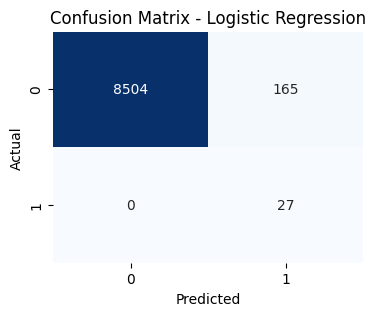

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_curve, auc, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Compute F1-Score
f1_train_log = f1_score(y_train, y_train_pred)
f1_test_log= f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_log:.4f}")
print(f"F1-Score (Test): {f1_test_log:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM

F1-Score (Train): 0.7208
F1-Score (Test): 0.7458
AUPRC: 0.6746
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.69      0.81      0.75        27

    accuracy                           1.00      8696
   macro avg       0.84      0.91      0.87      8696
weighted avg       1.00      1.00      1.00      8696



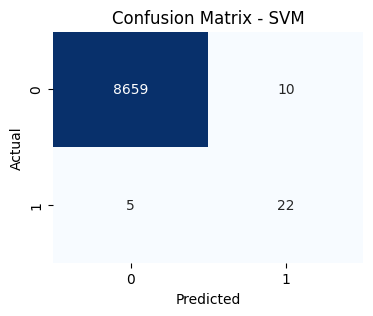

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train SVM
svm = SVC(probability=True, kernel='linear')  # Use probability=True to enable predict_proba()
svm.fit(X_train, y_train)

# Predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Compute F1-Score
f1_train_svm = f1_score(y_train, y_train_pred)
f1_test_svm = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, svm.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_svm:.4f}")
print(f"F1-Score (Test): {f1_test_svm :.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes

F1-Score (Train): 0.2711
F1-Score (Test): 0.3121
AUPRC: 0.6158
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8669
         1.0       0.18      1.00      0.31        27

    accuracy                           0.99      8696
   macro avg       0.59      0.99      0.65      8696
weighted avg       1.00      0.99      0.99      8696



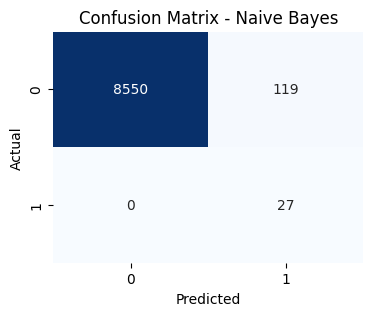

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Compute F1-Score
f1_train_nb = f1_score(y_train, y_train_pred)
f1_test_nb= f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, nb.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_nb :.4f}")
print(f"F1-Score (Test): {f1_test_nb:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



KNN

F1-Score (Train): 0.2459
F1-Score (Test): 0.1379
AUPRC: 0.3107
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       1.00      0.07      0.14        27

    accuracy                           1.00      8696
   macro avg       1.00      0.54      0.57      8696
weighted avg       1.00      1.00      1.00      8696



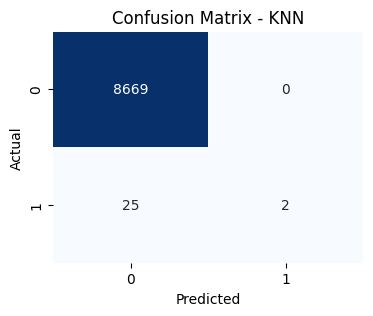

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute F1-Score
f1_train_knn = f1_score(y_train, y_train_pred)
f1_test_knn = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_knn:.4f}")
print(f"F1-Score (Test): {f1_test_knn:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Decision Tree

F1-Score (Train): 1.0000
F1-Score (Test): 0.9057
AUPRC: 0.9062
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.92      0.89      0.91        27

    accuracy                           1.00      8696
   macro avg       0.96      0.94      0.95      8696
weighted avg       1.00      1.00      1.00      8696



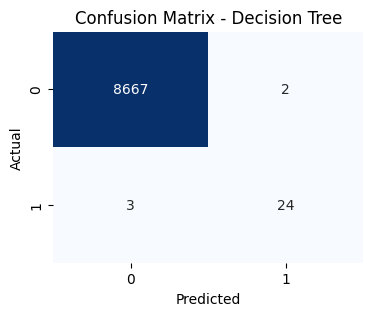

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Compute F1-Score
f1_train_dt= f1_score(y_train, y_train_pred)
f1_test_dt = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, dt.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_dt:.4f}")
print(f"F1-Score (Test): {f1_test_dt:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest

F1-Score (Train): 1.0000
F1-Score (Test): 0.9434
AUPRC: 0.9960
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.96      0.93      0.94        27

    accuracy                           1.00      8696
   macro avg       0.98      0.96      0.97      8696
weighted avg       1.00      1.00      1.00      8696



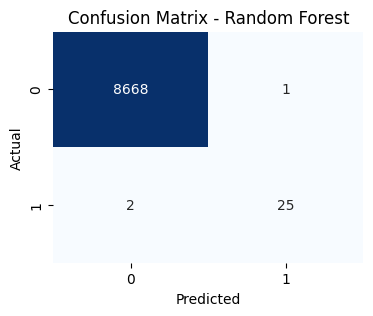

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Compute F1-Score
f1_train_rf = f1_score(y_train, y_train_pred)
f1_test_rf= f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_rf:.4f}")
print(f"F1-Score (Test): {f1_test_rf:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Ensamble learing(Logistic,SVM,NB,KNN)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1-Score (Train): 0.6630
F1-Score (Test): 0.7547
AUPRC: 0.8612
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.77      0.74      0.75        27

    accuracy                           1.00      8696
   macro avg       0.88      0.87      0.88      8696
weighted avg       1.00      1.00      1.00      8696



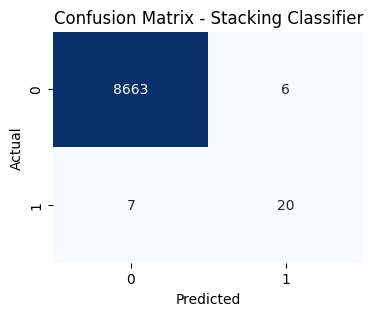

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc

# Definition of basic models
base_learners = [
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000)),
    ('svm', SVC(probability=True, kernel='linear')),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Definition of the final model (Meta-model)
meta_model = LogisticRegression()

# Create StackingClassifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Model training
stacking_model.fit(X_train, y_train)

# Predicting results
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# F1-Score Calculation
f1_train_stack = f1_score(y_train, y_train_pred)
f1_test_stack = f1_score(y_test, y_test_pred)

# AUPRC account
precision, recall, _ = precision_recall_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print results
print(f"F1-Score (Train): {f1_train_stack:.4f}")
print(f"F1-Score (Test): {f1_test_stack:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Draw confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-Score (Train): 1.0000
F1-Score (Test): 0.9643
AUPRC: 0.9858
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.93      1.00      0.96        27

    accuracy                           1.00      8696
   macro avg       0.97      1.00      0.98      8696
weighted avg       1.00      1.00      1.00      8696



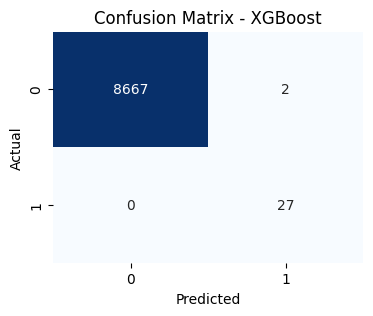

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Compute F1-Score
f1_train_xgb = f1_score(y_train, y_train_pred)
f1_test_xgb = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_xgb:.4f}")
print(f"F1-Score (Test): {f1_test_xgb :.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 LGBM Classifier

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 107, number of negative: 34677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 34784, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003076 -> initscore=-5.781003
[LightGBM] [Info] Start training from score -5.781003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

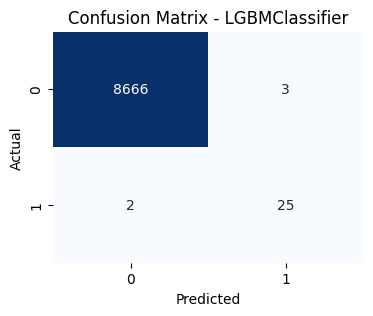

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train LGBMClassifier
LGBMClassifier_ = LGBMClassifier(eval_metric='logloss')
LGBMClassifier_.fit(X_train, y_train)

# Predictions
y_train_pred = LGBMClassifier_.predict(X_train)
y_test_pred = LGBMClassifier_.predict(X_test)

# Compute F1-Score
f1_train_lgbm= f1_score(y_train, y_train_pred)
f1_test_lgbm= f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, LGBMClassifier_.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_lgbm:.4f}")
print(f"F1-Score (Test): {f1_test_lgbm:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - LGBMClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



MLP Classifier

F1-Score (Train): 0.6667
F1-Score (Test): 0.7536
AUPRC: 0.8538
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.62      0.96      0.75        27

    accuracy                           1.00      8696
   macro avg       0.81      0.98      0.88      8696
weighted avg       1.00      1.00      1.00      8696



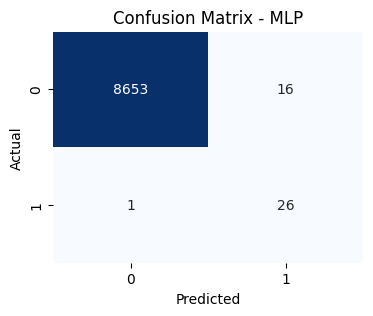

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train MLP
mlp = MLPClassifier(max_iter=1000, solver='adam', hidden_layer_sizes=(100,), random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Compute F1-Score
f1_train_mlp = f1_score(y_train, y_train_pred)
f1_test_mlp = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, mlp.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_mlp:.4f}")
print(f"F1-Score (Test): {f1_test_mlp:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gradient Boosting Classifier

F1-Score (Train): 0.9662
F1-Score (Test): 0.7869
AUPRC: 0.4982
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.71      0.89      0.79        27

    accuracy                           1.00      8696
   macro avg       0.85      0.94      0.89      8696
weighted avg       1.00      1.00      1.00      8696



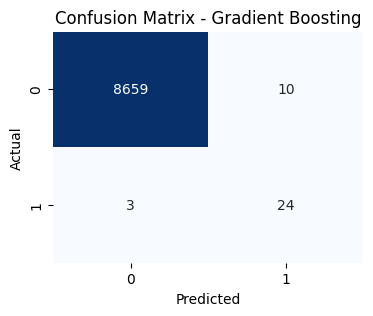

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Compute F1-Score
f1_train_gb = f1_score(y_train, y_train_pred)
f1_test_gb = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, gb.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_gb:.4f}")
print(f"F1-Score (Test): {f1_test_gb:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


cat boost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


F1-Score (Train): 1.0000
F1-Score (Test): 0.9643
AUPRC: 0.9803
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8669
         1.0       0.93      1.00      0.96        27

    accuracy                           1.00      8696
   macro avg       0.97      1.00      0.98      8696
weighted avg       1.00      1.00      1.00      8696



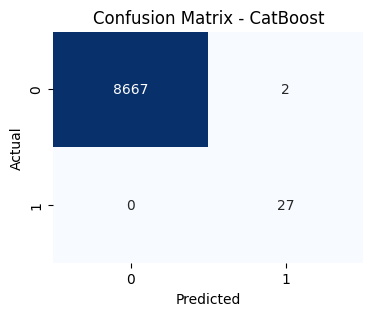

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train CatBoost
catboost = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0)
catboost.fit(X_train, y_train)

# Predictions
y_train_pred = catboost.predict(X_train)
y_test_pred = catboost.predict(X_test)

# Compute F1-Score
f1_train_catboost = f1_score(y_train, y_train_pred)
f1_test_catboost = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, catboost.predict_proba(X_test)[:, 1])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_catboost:.4f}")
print(f"F1-Score (Test): {f1_test_catboost:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


DNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8112 - loss: 1.2872 - val_accuracy: 0.9969 - val_loss: 0.1637 - learning_rate: 0.0010
Epoch 2/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9957 - loss: 0.1236 - val_accuracy: 0.9969 - val_loss: 0.0417 - learning_rate: 0.0010
Epoch 3/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9962 - loss: 0.0466 - val_accuracy: 0.9969 - val_loss: 0.0352 - learning_rate: 0.0010
Epoch 4/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9967 - loss: 0.0402 - val_accuracy: 0.9969 - val_loss: 0.0323 - learning_rate: 0.0010
Epoch 5/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9966 - loss: 0.0381 - val_accuracy: 0.9969 - val_loss: 0.0306 - learning_rate: 0.0010
Epoch 6/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9969 - loss: 0.0336 - val_accuracy: 0.9969 - val_loss: 0.0291 - learning_rate: 0.0010
Epoch 7/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


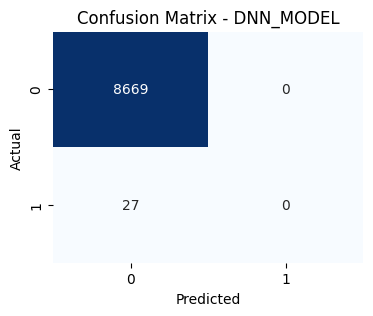

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create DNN_MODEL
DNN_MODEL = Sequential()

# Input Layer
DNN_MODEL.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# BatchNormalization and Dropout layers
DNN_MODEL.add(BatchNormalization())
DNN_MODEL.add(Dropout(0.5))

# Hidden Layers
DNN_MODEL.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DNN_MODEL.add(BatchNormalization())
DNN_MODEL.add(Dropout(0.5))

DNN_MODEL.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DNN_MODEL.add(BatchNormalization())
DNN_MODEL.add(Dropout(0.5))

# Output Layer
DNN_MODEL.add(Dense(1, activation='sigmoid'))

# Compile the model
DNN_MODEL.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
DNN_MODEL.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
              callbacks=[early_stopping, reduce_lr])

# Predictions
y_train_pred = DNN_MODEL.predict(X_train)
y_test_pred = DNN_MODEL.predict(X_test)

# Convert predictions to binary labels
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-Score
f1_train_dnn = f1_score(y_train, y_train_pred)
f1_test_dnn = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, DNN_MODEL.predict(X_test)[:, 0])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_dnn:.4f}")
print(f"F1-Score (Test): {f1_test_dnn:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - DNN_MODEL")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



LSTM

Epoch 1/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 93s 78ms/step - accuracy: 0.9580 - loss: 1.0929 - val_accuracy: 0.9979 - val_loss: 0.0355 - learning_rate: 0.0010
Epoch 2/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 135s 72ms/step - accuracy: 0.9978 - loss: 0.0399 - val_accuracy: 0.9969 - val_loss: 0.0298 - learning_rate: 0.0010
Epoch 3/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.9966 - loss: 0.0340 - val_accuracy: 0.9969 - val_loss: 0.6406 - learning_rate: 0.0010
Epoch 4/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 139s 72ms/step - accuracy: 0.9967 - loss: 0.0278 - val_accuracy: 0.9969 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 5/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9974 - loss: 0.0189 - val_accuracy: 0.9969 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 6/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 78s 72ms/step - accuracy: 0.9969 - loss: 0.0247 - val_accuracy: 0.9969 - val_loss: 0.0648 - learning_rate: 0.0010
Epoch 7/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step

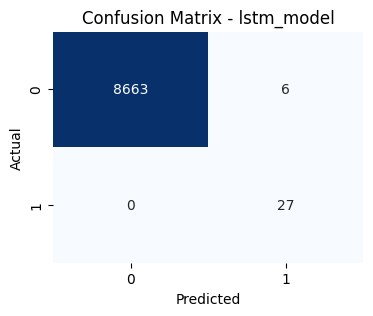

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np  # للتأكد من استخدام NumPy

# Create lstm_model
lstm_model = Sequential()

# Input Layer (LSTM)
lstm_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True,
                    kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))

# Additional LSTM Layer
lstm_model.add(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))

# Dense Layer
lstm_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(Dropout(0.5))

# Output Layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Convert to NumPy arrays and reshape input data for LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test),
               callbacks=[early_stopping, reduce_lr])

# Predictions
y_train_pred = lstm_model.predict(X_train_lstm)
y_test_pred = lstm_model.predict(X_test_lstm)

# Convert predictions to binary labels
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-Score
f1_train_lstm = f1_score(y_train, y_train_pred)
f1_test_lstm = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, lstm_model.predict(X_test_lstm)[:, 0])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_lstm:.4f}")
print(f"F1-Score (Test): {f1_test_lstm:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - lstm_model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


GRUS

Epoch 1/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.8961 - loss: 1.2135 - val_accuracy: 0.9978 - val_loss: 0.0682 - learning_rate: 0.0010
Epoch 2/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9970 - loss: 0.0536 - val_accuracy: 0.9982 - val_loss: 0.0151 - learning_rate: 0.0010
Epoch 3/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9978 - loss: 0.0220 - val_accuracy: 0.9969 - val_loss: 0.0213 - learning_rate: 0.0010
Epoch 4/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.9971 - loss: 0.0219 - val_accuracy: 0.9969 - val_loss: 0.0251 - learning_rate: 0.0010
Epoch 5/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9971 - loss: 0.0198 - val_accuracy: 0.9969 - val_loss: 0.3458 - learning_rate: 0.0010
Epoch 6/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 73s 67ms/step - accuracy: 0.9974 - loss: 0.0239 - val_accuracy: 0.9969 - val_loss: 0.0149 - learning_rate: 5.0000e-04
Epoch 7/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/st

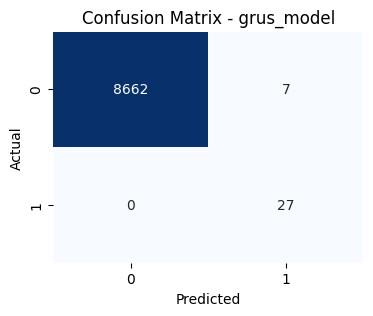

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np  # للتأكد من استخدام NumPy

# Create grus_model
grus_model = Sequential()

# Input Layer (GRU)
grus_model.add(GRU(128, input_shape=(X_train.shape[1], 1), return_sequences=True,
                   kernel_regularizer=regularizers.l2(0.01)))
grus_model.add(BatchNormalization())
grus_model.add(Dropout(0.5))

# Additional GRU Layer
grus_model.add(GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
grus_model.add(BatchNormalization())
grus_model.add(Dropout(0.5))

# Dense Layer
grus_model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
grus_model.add(Dropout(0.5))

# Output Layer
grus_model.add(Dense(1, activation='sigmoid'))

# Compile the model
grus_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Convert to NumPy arrays and reshape input data for GRU
X_train_gru = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
grus_model.fit(X_train_gru, y_train, epochs=100, batch_size=32, validation_data=(X_test_gru, y_test),
               callbacks=[early_stopping, reduce_lr])

# Predictions
y_train_pred = grus_model.predict(X_train_gru)
y_test_pred = grus_model.predict(X_test_gru)

# Convert predictions to binary labels
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-Score
f1_train_gru = f1_score(y_train, y_train_pred)
f1_test_gru = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, grus_model.predict(X_test_gru)[:, 0])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_gru:.4f}")
print(f"F1-Score (Test): {f1_test_gru:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - grus_model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Encoder-Decoder

Epoch 1/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 94s 76ms/step - accuracy: 0.9002 - loss: 1.1767 - val_accuracy: 0.9969 - val_loss: 0.0610 - learning_rate: 0.0010
Epoch 2/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 133s 68ms/step - accuracy: 0.9972 - loss: 0.0507 - val_accuracy: 0.9969 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 3/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.9970 - loss: 0.0229 - val_accuracy: 0.9986 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 4/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.9974 - loss: 0.0210 - val_accuracy: 0.9977 - val_loss: 0.0259 - learning_rate: 0.0010
Epoch 5/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9965 - loss: 0.0257 - val_accuracy: 0.9987 - val_loss: 0.0187 - learning_rate: 0.0010
Epoch 6/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9977 - loss: 0.0214 - val_accuracy: 0.9978 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 7/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step 

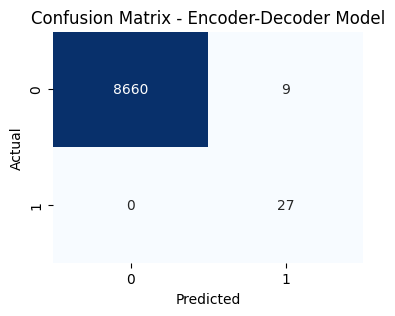

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np  # تأكد من استيراد NumPy

# Encoder part of the model
encoder_inputs = Input(shape=(X_train.shape[1], 1))  # Adjust input shape according to your data
encoder_gru = GRU(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(encoder_inputs)
encoder_gru = BatchNormalization()(encoder_gru)
encoder_gru = Dropout(0.5)(encoder_gru)

encoder_gru2 = GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(encoder_gru)
encoder_gru2 = BatchNormalization()(encoder_gru2)
encoder_gru2 = Dropout(0.5)(encoder_gru2)

# Decoder part of the model (this is a simple decoder with Dense output)
decoder_dense = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(encoder_gru2)
decoder_dense = Dropout(0.5)(decoder_dense)
decoder_output = Dense(1, activation='sigmoid')(decoder_dense)

# Create the encoder-decoder model
encoder_decoder_model = Model(inputs=encoder_inputs, outputs=decoder_output)

# Compile the model
encoder_decoder_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Convert to NumPy arrays and reshape input data for GRU (Encoder-Decoder)
X_train_encdec = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))  # Convert to NumPy and reshape
X_test_encdec = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))  # Convert to NumPy and reshape

# Train the model
encoder_decoder_model.fit(X_train_encdec, y_train, epochs=100, batch_size=32, validation_data=(X_test_encdec, y_test),
                          callbacks=[early_stopping, reduce_lr])

# Predictions
y_train_pred = encoder_decoder_model.predict(X_train_encdec)
y_test_pred = encoder_decoder_model.predict(X_test_encdec)

# Convert predictions to binary labels
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-Score
f1_train_encdec = f1_score(y_train, y_train_pred)
f1_test_encdec = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, encoder_decoder_model.predict(X_test_encdec)[:, 0])
auprc = auc(recall, precision)

# Print Results
print(f"F1-Score (Train): {f1_train_encdec:.4f}")
print(f"F1-Score (Test): {f1_test_encdec:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Encoder-Decoder Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Models Comparison

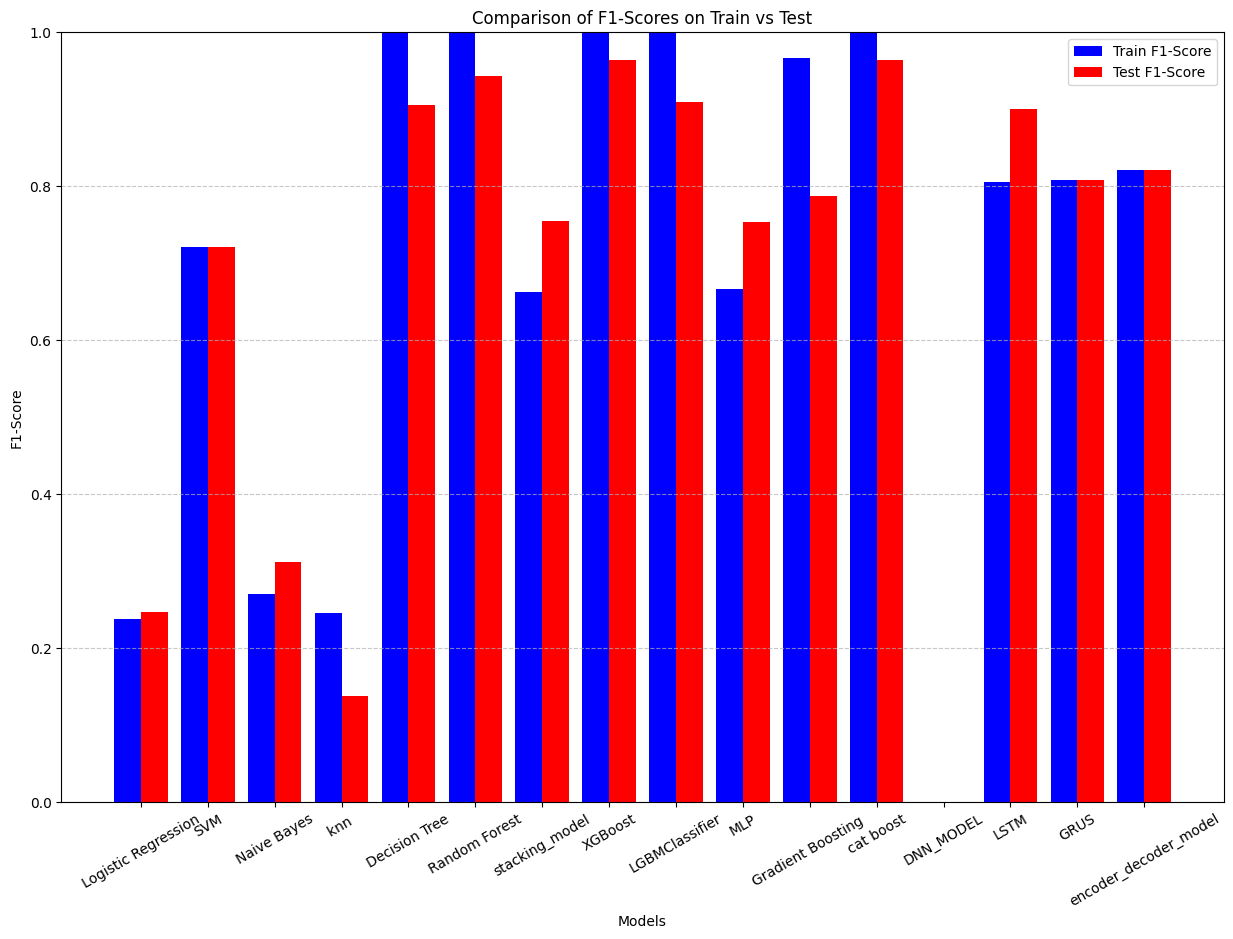

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# F1-Scores for each model
models = ['Logistic Regression','SVM', 'Naive Bayes','knn ', 'Decision Tree', 'Random Forest','stacking_model', 'XGBoost','LGBMClassifier','MLP','Gradient Boosting ','cat boost','DNN_MODEL','LSTM','GRUS',"encoder_decoder_model"]
f1_train_scores = [f1_train_log,f1_train_svm, f1_train_nb, f1_train_knn,f1_train_dt, f1_train_rf,f1_train_stack, f1_train_xgb ,f1_train_lgbm,f1_train_mlp,f1_train_gb,f1_train_catboost,f1_train_dnn,f1_train_lstm ,f1_train_gru,f1_train_encdec]
f1_test_scores = [f1_test_log,f1_train_svm, f1_test_nb,f1_test_knn, f1_test_dt, f1_test_rf, f1_test_stack,f1_test_xgb,f1_test_lgbm,f1_test_mlp,f1_test_gb,f1_test_catboost,f1_test_dnn,f1_test_lstm,f1_train_gru ,f1_train_encdec]

x = np.arange(len(models))  # the label locations

plt.figure(figsize=(15, 10))
plt.bar(x - 0.2, f1_train_scores, 0.4, label='Train F1-Score', color='blue')
plt.bar(x + 0.2, f1_test_scores, 0.4, label='Test F1-Score', color='red')

plt.xticks(x, models, rotation=30)
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Comparison of F1-Scores on Train vs Test')
plt.legend()
plt.ylim(0, 1)  # Limit F1-score range between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Encoder-Decoder Model is the best model

#Fine Tunning

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 154s 265ms/step - accuracy: 0.9844 - loss: 1.9547 - val_accuracy: 0.9974 - val_loss: 0.0827 - learning_rate: 5.0000e-04
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 201s 264ms/step - accuracy: 0.9978 - loss: 0.0529 - val_accuracy: 0.9987 - val_loss: 0.0192 - learning_rate: 5.0000e-04
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 199s 258ms/step - accuracy: 0.9978 - loss: 0.0247 - val_accuracy: 0.9990 - val_loss: 0.0268 - learning_rate: 5.0000e-04
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 144s 263ms/step - accuracy: 0.9981 - loss: 0.0208 - val_accuracy: 0.9991 - val_loss: 0.0095 - learning_rate: 5.0000e-04
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 198s 255ms/step - accuracy: 0.9980 - loss: 0.0177 - val_accuracy: 0.9986 - val_loss: 0.0124 - learning_rate: 5.0000e-04
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 143s 258ms/step - accuracy: 0.9978 - loss: 0.0166 - val_accuracy: 0.9991 - val_loss: 0.0075 - learning_rate: 5.0000e-04
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 

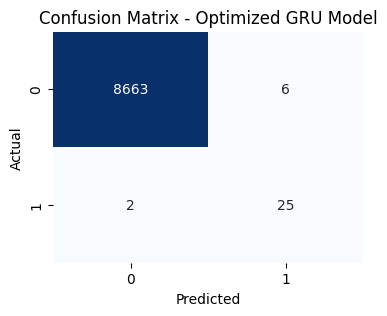

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.layers import LeakyReLU

# Reduce learning rate for better convergence
learning_rate = 0.0005

# Define the optimized GRU-based model
encoder_inputs = Input(shape=(X_train.shape[1], 1))

# First GRU layer with increased units (256 instead of 128)
encoder_gru = GRU(256, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(encoder_inputs)
encoder_gru = BatchNormalization()(encoder_gru)
encoder_gru = Dropout(0.3)(encoder_gru)  # Reduce Dropout to preserve more information

# Second GRU layer with increased units (128 instead of 64)
encoder_gru2 = GRU(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(encoder_gru)
encoder_gru2 = BatchNormalization()(encoder_gru2)
encoder_gru2 = Dropout(0.3)(encoder_gru2)  # Reduce Dropout

# Fully connected layer with LeakyReLU for better activation handling
decoder_dense = Dense(64, kernel_regularizer=regularizers.l2(0.01))(encoder_gru2)
decoder_dense = LeakyReLU(alpha=0.1)(decoder_dense)  # Replace ReLU with LeakyReLU
decoder_dense = Dropout(0.3)(decoder_dense)

# Output layer (sigmoid for binary classification)
decoder_output = Dense(1, activation='sigmoid')(decoder_dense)

# Build the model
encoder_decoder_model = Model(inputs=encoder_inputs, outputs=decoder_output)

# Compile the model with a smaller learning rate
encoder_decoder_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Convert data to NumPy arrays and reshape for GRU input
X_train_encdec = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_encdec = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with a larger batch size (64 instead of 32)
encoder_decoder_model.fit(X_train_encdec, y_train, epochs=50, batch_size=64, validation_data=(X_test_encdec, y_test),
                          callbacks=[early_stopping, reduce_lr])

# Make predictions
y_train_pred = encoder_decoder_model.predict(X_train_encdec)
y_test_pred = encoder_decoder_model.predict(X_test_encdec)

# Convert predictions to binary values
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-score
f1_train_encdec = f1_score(y_train, y_train_pred)
f1_test_encdec = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, encoder_decoder_model.predict(X_test_encdec)[:, 0])
auprc = auc(recall, precision)

# Print results
print(f"F1-Score (Train): {f1_train_encdec:.4f}")
print(f"F1-Score (Test): {f1_test_encdec:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Optimized GRU Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Epoch 1/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.9803 - loss: 0.2158 - val_accuracy: 0.9990 - val_loss: 0.0551 - learning_rate: 0.0010
Epoch 2/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - accuracy: 0.9970 - loss: 0.0535 - val_accuracy: 0.9989 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 3/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - accuracy: 0.9975 - loss: 0.0222 - val_accuracy: 0.9969 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 4/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9975 - loss: 0.0160 - val_accuracy: 0.9992 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 5/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 71s 65ms/step - accuracy: 0.9980 - loss: 0.0136 - val_accuracy: 0.9990 - val_loss: 0.0089 - learning_rate: 0.0010
Epoch 6/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9978 - loss: 0.0121 - val_accuracy: 0.9991 - val_loss: 0.0115 - learning_rate: 0.0010
Epoch 7/70
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 71s 65ms/step - accura

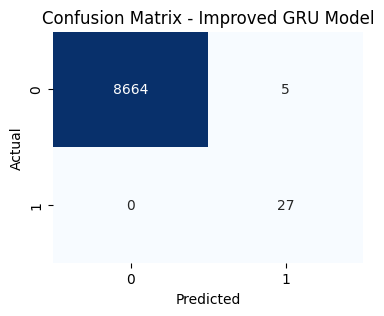

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Set optimized learning rate
learning_rate = 0.001

# Define the GRU-based model
encoder_inputs = Input(shape=(X_train.shape[1], 1))

# First GRU layer (Reduced units from 256 to 128)
encoder_gru = GRU(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.001))(encoder_inputs)
encoder_gru = BatchNormalization()(encoder_gru)
encoder_gru = Dropout(0.4)(encoder_gru)  # Increased Dropout

# Second GRU layer (Reduced units from 128 to 64)
encoder_gru2 = GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.001))(encoder_gru)
encoder_gru2 = BatchNormalization()(encoder_gru2)
encoder_gru2 = Dropout(0.4)(encoder_gru2)  # Increased Dropout

# Fully connected layer with ReLU
decoder_dense = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(encoder_gru2)
decoder_dense = Dropout(0.4)(decoder_dense)  # Increased Dropout

# Output layer (sigmoid for binary classification)
decoder_output = Dense(1, activation='sigmoid')(decoder_dense)

# Build the model
encoder_decoder_model = Model(inputs=encoder_inputs, outputs=decoder_output)

# Compile the model
encoder_decoder_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, min_lr=1e-6)

# Convert data to NumPy arrays and reshape
X_train_encdec = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_encdec = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with optimized batch size and epochs
encoder_decoder_model.fit(X_train_encdec, y_train, epochs=70, batch_size=32, validation_data=(X_test_encdec, y_test),
                          callbacks=[early_stopping, reduce_lr])

# Predictions
y_train_pred = encoder_decoder_model.predict(X_train_encdec)
y_test_pred = encoder_decoder_model.predict(X_test_encdec)

# Convert predictions to binary values
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-score
f1_train_encdec = f1_score(y_train, y_train_pred)
f1_test_encdec = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, encoder_decoder_model.predict(X_test_encdec)[:, 0])
auprc = auc(recall, precision)

# Print results
print(f"F1-Score (Train): {f1_train_encdec:.4f}")
print(f"F1-Score (Test): {f1_test_encdec:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Improved GRU Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Epoch 1/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 169s 287ms/step - accuracy: 0.9126 - loss: 2.7003 - val_accuracy: 0.9987 - val_loss: 0.2020 - learning_rate: 5.0000e-04
Epoch 2/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 153s 282ms/step - accuracy: 0.9978 - loss: 0.1407 - val_accuracy: 0.9989 - val_loss: 0.0334 - learning_rate: 5.0000e-04
Epoch 3/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 200s 279ms/step - accuracy: 0.9980 - loss: 0.0508 - val_accuracy: 0.9992 - val_loss: 0.0186 - learning_rate: 5.0000e-04
Epoch 4/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 203s 281ms/step - accuracy: 0.9980 - loss: 0.0231 - val_accuracy: 0.9992 - val_loss: 0.0137 - learning_rate: 5.0000e-04
Epoch 5/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 204s 284ms/step - accuracy: 0.9982 - loss: 0.0166 - val_accuracy: 0.9969 - val_loss: 0.0111 - learning_rate: 5.0000e-04
Epoch 6/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 212s 302ms/step - accuracy: 0.9977 - loss: 0.0166 - val_accuracy: 0.9969 - val_loss: 0.0134 - learning_rate: 5.0000e-04
Epoch 7/150
544/544 ━━━━━━━━━━━━━━

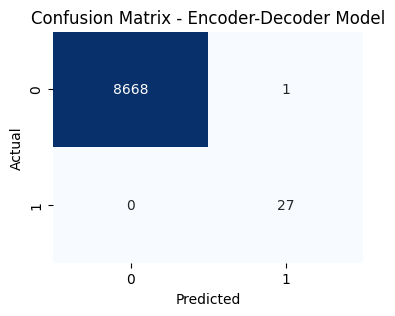

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Define input shape based on training data
input_shape = (X_train.shape[1], 1)

# Encoder part of the model
encoder_inputs = Input(shape=input_shape)

# First GRU Layer with increased units
encoder_gru = GRU(256, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(encoder_inputs)
encoder_gru = BatchNormalization()(encoder_gru)
encoder_gru = Dropout(0.3)(encoder_gru)  # Lower dropout to retain more information

# Second GRU Layer with increased units
encoder_gru2 = GRU(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(encoder_gru)
encoder_gru2 = BatchNormalization()(encoder_gru2)
encoder_gru2 = Dropout(0.3)(encoder_gru2)

# Third GRU Layer (Newly added)
encoder_gru3 = GRU(32, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(encoder_gru2)
encoder_gru3 = BatchNormalization()(encoder_gru3)
encoder_gru3 = Dropout(0.3)(encoder_gru3)

# Fully connected layers (Decoder part)
decoder_dense = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(encoder_gru3)
decoder_dense = Dropout(0.3)(decoder_dense)

# Output layer
decoder_output = Dense(1, activation='sigmoid')(decoder_dense)

# Create and compile the model
encoder_decoder_model = Model(inputs=encoder_inputs, outputs=decoder_output)
encoder_decoder_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Convert data to NumPy arrays and reshape for GRU
X_train_encdec = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_encdec = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model with increased batch size
encoder_decoder_model.fit(X_train_encdec, y_train, epochs=150, batch_size=64, validation_data=(X_test_encdec, y_test),
                          callbacks=[early_stopping, reduce_lr])

# Predictions
y_train_pred = encoder_decoder_model.predict(X_train_encdec)
y_test_pred = encoder_decoder_model.predict(X_test_encdec)

# Convert predictions to binary labels
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

# Compute F1-Score
f1_train_encdec = f1_score(y_train, y_train_pred)
f1_test_encdec = f1_score(y_test, y_test_pred)

# Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, encoder_decoder_model.predict(X_test_encdec)[:, 0])
auprc = auc(recall, precision)

# Print results
print(f"F1-Score (Train): {f1_train_encdec:.4f}")
print(f"F1-Score (Test): {f1_test_encdec:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Encoder-Decoder Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Epoch 1/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.9707 - loss: 1.1195 - val_accuracy: 0.9978 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 2/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.9973 - loss: 0.0272 - val_accuracy: 0.9969 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 3/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.9971 - loss: 0.0189 - val_accuracy: 0.9969 - val_loss: 0.0172 - learning_rate: 0.0010
Epoch 4/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9971 - loss: 0.0210 - val_accuracy: 0.9969 - val_loss: 0.0111 - learning_rate: 0.0010
Epoch 5/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9969 - loss: 0.0170 - val_accuracy: 0.9969 - val_loss: 0.0184 - learning_rate: 0.0010
Epoch 6/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9970 - loss: 0.0269 - val_accuracy: 0.9969 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 7/100
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 50s 46ms/step -

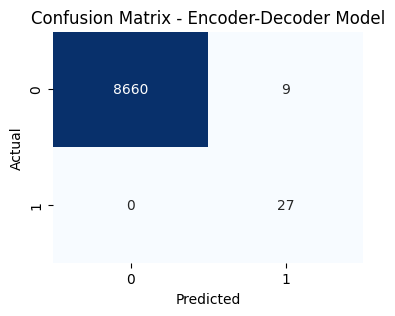

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score, precision_recall_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Reduce Overfitting: Reduce GRU units and increase regularization
encoder_inputs = Input(shape=(X_train.shape[1], 1))

#  First GRU Layer (Reduced to 96 units)
encoder_gru = GRU(96, return_sequences=True, kernel_regularizer=regularizers.l2(0.02))(encoder_inputs)
encoder_gru = BatchNormalization()(encoder_gru)
encoder_gru = Dropout(0.5)(encoder_gru)  # Increased Dropout

#  Second GRU Layer (Reduced to 48 units)
encoder_gru2 = GRU(48, return_sequences=False, kernel_regularizer=regularizers.l2(0.02))(encoder_gru)
encoder_gru2 = BatchNormalization()(encoder_gru2)
encoder_gru2 = Dropout(0.5)(encoder_gru2)  # Increased Dropout

#  Fully Connected Layers (Regularized)
decoder_dense = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02))(encoder_gru2)
decoder_dense = Dropout(0.4)(decoder_dense)  # Increased Dropout
decoder_output = Dense(1, activation='sigmoid')(decoder_dense)

#  Create the Model
encoder_decoder_model = Model(inputs=encoder_inputs, outputs=decoder_output)

#  Compile the Model (Reduced Learning Rate for Stability)
encoder_decoder_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#  Callbacks (More Aggressive Overfitting Control)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-5, verbose=1)  # More responsive

#  Convert to NumPy and Reshape Input Data for GRU
X_train_encdec = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_encdec = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

#  Train the Model
encoder_decoder_model.fit(X_train_encdec, y_train, epochs=100, batch_size=32, validation_data=(X_test_encdec, y_test),
                          callbacks=[early_stopping, reduce_lr])

#  Predictions
y_train_pred = encoder_decoder_model.predict(X_train_encdec)
y_test_pred = encoder_decoder_model.predict(X_test_encdec)

#  Convert Predictions to Binary Labels
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

#  Compute F1-Score
f1_train_encdec = f1_score(y_train, y_train_pred)
f1_test_encdec = f1_score(y_test, y_test_pred)

#  Compute AUPRC
precision, recall, _ = precision_recall_curve(y_test, encoder_decoder_model.predict(X_test_encdec)[:, 0])
auprc = auc(recall, precision)

#  Print Results
print(f"F1-Score (Train): {f1_train_encdec:.4f}")
print(f"F1-Score (Test): {f1_test_encdec:.4f}")
print(f"AUPRC: {auprc:.4f}")

print(classification_report(y_test, y_test_pred))

#  Plot Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Encoder-Decoder Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
